# 참조: [1](https://huggingface.co/docs/diffusers/api/pipelines/text_to_video)[ 2](https://huggingface.co/docs/diffusers/using-diffusers/svd) [3](https://huggingface.co/docs/diffusers/api/pipelines/stable_diffusion/img2img) [4](https://huggingface.co/docs/diffusers/api/pipelines/stable_diffusion/text2img)


In [ ]:
!pip install -q --upgrade git+https://github.com/huggingface/diffusers.git transformers accelerate scipy

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 24.1 MB/s eta 0:00:00



```
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 18.1 MB/s eta 0:00:00
  Building wheel for diffusers (pyproject.toml) ... done

```



In [ ]:
import torch
from diffusers import DiffusionPipeline
from diffusers.utils import export_to_video



```
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.

 0/0 [00:00<?, ?it/s]
```



# generating a short video with the default length of 16 frames (2s at 8 fps):

In [ ]:
pipe = DiffusionPipeline.from_pretrained("damo-vilab/text-to-video-ms-1.7b",
                                          torch_dtype=torch.float16,
                                          variant="fp16")
pipe = pipe.to("cuda")

prompt = "Spiderman is surfing"
video_frames = pipe(prompt).frames[0]

video_path = export_to_video(video_frames)
video_path

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning:
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


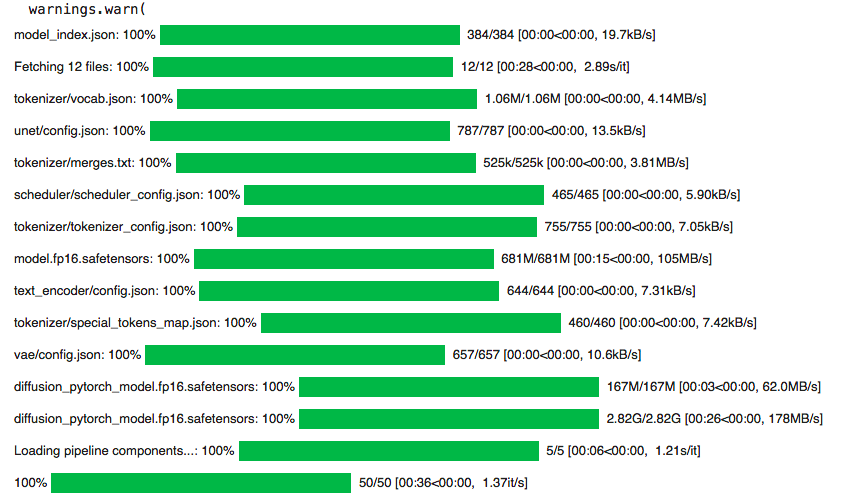


[/tmp/tmpxkq615jc.mp4](https://ibb.co/thV8BsY)


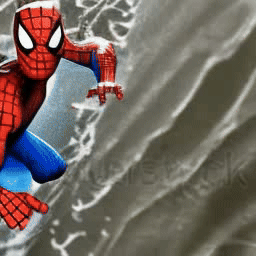

# 아래 런타임을 CPU 로 세팅하면 아래와 같이 에러가 발생함.

Diffusers supports different optimization techniques to improve the latency and memory footprint of a pipeline. Since videos are often more memory-heavy than images, we can enable CPU offloading and VAE slicing to keep the memory footprint at bay.

Let’s generate a video of 8 seconds (64 frames) on the same GPU using CPU offloading and VAE slicing:

In [ ]:
import torch
from diffusers import DiffusionPipeline
from diffusers.utils import export_to_video

pipe = DiffusionPipeline.from_pretrained("damo-vilab/text-to-video-ms-1.7b", torch_dtype=torch.float16, variant="fp16")
pipe.enable_model_cpu_offload()

# memory optimization
pipe.enable_vae_slicing()

prompt = "Darth Vader surfing a wave"
video_frames = pipe(prompt, num_frames=64).frames[0] # 🛑 여기서 에러 발생.
video_path = export_to_video(video_frames)
video_path

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/644 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/755 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/787 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/657 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/681M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/2.82G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx



```
---------------------------------------------------------------------------

RuntimeError                              Traceback (most recent call last)

<ipython-input-2-892629b62d23> in <cell line: 12>()
     10
     11 prompt = "Darth Vader surfing a wave"
---> 12 video_frames = pipe(prompt, num_frames=64).frames[0]
     13 video_path = export_to_video(video_frames)
     14 video_path

3 frames

/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py in decorate_context(*args, **kwargs)
    113     def decorate_context(*args, **kwargs):
    114         with ctx_factory():
--> 115             return func(*args, **kwargs)
    116
    117     return decorate_context

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/text_to_video_synthesis/pipeline_text_to_video_synth.py in __call__(self, prompt, height, width, num_frames, num_inference_steps, guidance_scale, negative_prompt, eta, generator, latents, prompt_embeds, negative_prompt_embeds, output_type, return_dict, callback, callback_steps, cross_attention_kwargs, clip_skip)
    570             cross_attention_kwargs.get("scale", None) if cross_attention_kwargs is not None else None
    571         )
--> 572         prompt_embeds, negative_prompt_embeds = self.encode_prompt(
    573             prompt,
    574             device,

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/text_to_video_synthesis/pipeline_text_to_video_synth.py in encode_prompt(self, prompt, device, num_images_per_prompt, do_classifier_free_guidance, negative_prompt, prompt_embeds, negative_prompt_embeds, lora_scale, clip_skip)
    255
    256             if clip_skip is None:
--> 257                 prompt_embeds = self.text_encoder(text_input_ids.to(device), attention_mask=attention_mask)
    258                 prompt_embeds = prompt_embeds[0]
    259             else:

/usr/local/lib/python3.10/dist-packages/torch/cuda/__init__.py in _lazy_init()
    300         if "CUDA_MODULE_LOADING" not in os.environ:
    301             os.environ["CUDA_MODULE_LOADING"] = "LAZY"
--> 302         torch._C._cuda_init()
    303         # Some of the queued calls may reentrantly call _lazy_init();
    304         # we need to just return without initializing in that case.

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx
```

